In [ ]:
!pip install transformers
!pip install datasets
!pip install trl

In [ ]:
!pip install trl

In [1]:
ls ckpts_ppo1

ppo_5/  ppo_5.19/  ppo_5.39/  ppo_5.59/  ppo_5.79/  sft_5/


[('transformer.wte.weight',
  Parameter containing:
  tensor([[ 0.0986, -0.0913,  0.0996,  ...,  0.0054,  0.0369,  0.0503],
          [ 0.0493, -0.0869,  0.0649,  ..., -0.0192,  0.0066,  0.0011],
          [ 0.0820, -0.0284,  0.0483,  ...,  0.0674, -0.0398,  0.0635],
          ...,
          [ 0.1260, -0.1465,  0.1709,  ...,  0.0270, -0.0708,  0.0850],
          [-0.0096, -0.0806,  0.1230,  ...,  0.0566,  0.0728,  0.1240],
          [ 0.0669, -0.0947,  0.0913,  ...,  0.0027, -0.0359,  0.0544]],
         requires_grad=True)),
 ('transformer.wpe.weight',
  Parameter containing:
  tensor([[ 0.0493, -0.0199,  0.0216,  ...,  0.0067, -0.1040,  0.0013],
          [ 0.0087, -0.0840, -0.0062,  ...,  0.0186, -0.0508,  0.0001],
          [ 0.0176, -0.0164, -0.0027,  ...,  0.0177, -0.0228,  0.0038],
          ...,
          [ 0.0123,  0.0369, -0.0210,  ...,  0.0216,  0.0364,  0.0206],
          [ 0.0117,  0.0359, -0.0272,  ...,  0.0121,  0.0374,  0.0304],
          [ 0.0181,  0.0293, -0.0209,  ...

In [6]:
ls ckpts_ppo1

ppo_5/      ppo_5.19/   ppo_5.259/  ppo_5.339/  ppo_5.79/   sft_5/
ppo_5.139/  ppo_5.199/  ppo_5.279/  ppo_5.39/   ppo_5.932/
ppo_5.159/  ppo_5.219/  ppo_5.299/  ppo_5.466/  ppo_5.939/
ppo_5.179/  ppo_5.239/  ppo_5.319/  ppo_5.59/   ppo_5.959/


In [1]:
import torch

import time
import os
from tqdm import tqdm
import numpy as np
import pandas as pd


from datasets import load_dataset

from transformers import AutoTokenizer, pipeline
import torch
from tqdm import tqdm
from transformers import pipeline, AutoTokenizer
from datasets import load_dataset
from trl import  AutoModelForCausalLMWithValueHead

In [2]:
from transformers import AutoTokenizer, OPTForCausalLM

#tokenizer = AutoTokenizer.from_pretrained("facebook/galactica-1.3b")
#model = 

from transformers import AutoTokenizer, GPT2LMHeadModel, GPT2TokenizerFast 
from transformers import GPTNeoForCausalLM,GPTNeoXForCausalLM,AutoModelForCausalLM,AutoModelForSeq2SeqLM
tokenizer = GPT2TokenizerFast.from_pretrained("AlexWortega/instruct_rugptlarge",padding_side='left')

tokenizer.pad_token = tokenizer.eos_token 
tokenizer.pad_token = tokenizer.eos_token
#gpt2_model = AutoModelForCausalLM.from_pretrained("gpt2")
#gpt2_model  = AutoModelForCausalLM.from_pretrained("bigscience/bloom-560m")

In [3]:
gpt2_model = AutoModelForCausalLMWithValueHead.from_pretrained('ckpts_classic/ppo_5.19')

Some weights of the model checkpoint at ckpts_classic/ppo_5.19 were not used when initializing GPT2LMHeadModel: ['v_head.summary.weight', 'v_head.summary.bias']
- This IS expected if you are initializing GPT2LMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2LMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
model = AutoModelForCausalLMWithValueHead.from_pretrained('ckpts_ppo1/ppo_5.19')


Some weights of the model checkpoint at ckpts_ppo1/ppo_5.19 were not used when initializing GPT2LMHeadModel: ['v_head.summary.weight', 'v_head.summary.bias']
- This IS expected if you are initializing GPT2LMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2LMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
model1 = GPT2LMHeadModel.from_pretrained("AlexWortega/instruct_rugptlarge")

/home/user/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


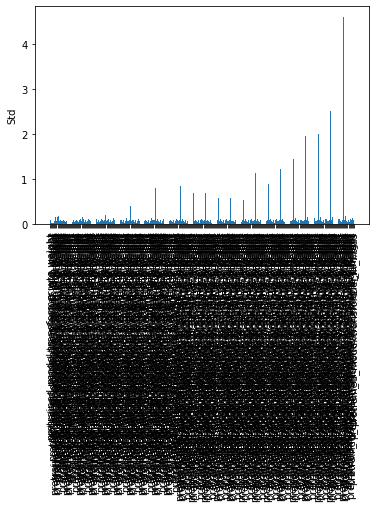

In [6]:
stdlist = []
names = []

# Перебираем каждый параметр и подсчитываем std
for name, param in gpt2_model.named_parameters():
    # Проверяем название параметра
    if 'transformer' in name or 'shared' in name:
        stdlist.append(torch.std(param).detach().numpy())
        names+=[name]

# Выводим график std по параметрам
import matplotlib.pyplot as plt
plt.bar(range(len(stdlist)), stdlist)


plt.ylabel('Std')
plt.xticks(range(len(stdlist)), names, rotation=90)
plt.tight_layout()
plt.show()

In [6]:
device = 'cuda'

In [7]:
gpt2_model = gpt2_model.to(device)


In [8]:
model = model.to(device)

In [9]:
model1 = model1.to(device)


In [10]:
gen_kwargs = {
        "min_length": 20,
        "max_new_tokens": 512,
        "temperature": 1,
        #"typical_p": 0.9,
        "top_k":50,
        "top_p": 0.91,
        "do_sample": True,  
        "early_stopping": True,
        "no_repeat_ngram_size": 2,
        "eos_token_id": 50261,
        "pad_token_id": 50261,
        "use_cache": True,
        #"repetition_penalty": 1.5,  
        #"length_penalty": 0.8, 
        #"bad_words_ids": bad_words_ids,
        "num_beams": 4,
        "num_return_sequences": 1
    }


In [11]:
text = """Докажи теорему пифагора<instructionS>""" #Когда умер пушкин?
def md1(text):
    enc = tokenizer.encode(text,truncation=True, return_tensors='pt')
    gen = gpt2_model.generate(enc.to(device),**gen_kwargs)
    return tokenizer.decode(gen[0])
def md2(text):
    enc = tokenizer.encode(text,truncation=True, return_tensors='pt')
    gen = model.generate(enc.to(device),**gen_kwargs)
    return tokenizer.decode(gen[0])
def md3(text):
    enc = tokenizer.encode(text,truncation=True, return_tensors='pt')
    gen = model1.generate(enc.to(device),**gen_kwargs)
    return tokenizer.decode(gen[0])


In [35]:
print(md1(text))#classic

Докажи теорему пифагора<instructionS> Теорема пифагорова треугольника утверждает, что сумма квадратов катетов равна квадрату гипотенузы. 

Пример:

Квадрат гипотензы равен (2^2 + 4^3) / 2. <instructionE>


In [36]:
print(md2(text))#retriva

Докажи теорему пифагора<instructionS> Теорема пифагорова треугольника утверждает, что квадрат гипотенузы прямоугольника равен сумме квадратов катетов.

Для доказательства этой теоремы нужно выполнить следующие действия:
1. Проверить, есть ли в гипотенузе треугольник. Для этого нужно найти катеты прямоугольников, которые лежат на прямой, проходящей через центр гипотенызы. Если есть, то теорема верна. 
2. Найти категир, который является гипотенойзовым треугольником. Это будет катет, лежащий на гипотенезе. Он равен произведению длины гипотеназы на ее высоту. 

3. Вычислить площадь треугольников. Формула для вычисления этой площади: P = 2πr^2, где r - радиус, а P - площадь. Эта формула используется для определения площади прямоугольных треугольных фигур, таких как треугольники, трапеции и другие фигуры, связанные с геометрией. Она также используется при решении задач по геометрии, например, для нахождения длины окружности, площади круга и т.д.  <instructionE>


In [37]:
print(md3(text))#sft

Докажи теорему пифагора<instructionS> Пифагор доказал, что квадрат гипотенузы равен сумме квадратов катетов. <instructionE>


In [12]:
df = pd.read_json('rulm-sbs/tasks/vicuna_question_ru.jsonl',lines=True)

In [14]:
df['instruction'][0]

'Как улучшить свои навыки управления временем (time management)?'

In [14]:
code_q = ['Корреляция двух переменных во временном ряду в Python?', 'Проверьте, содержит ли словарь python значение, и если да, верните связанное значение', 'Как запустить Docker контейнер?','Докажи теорему пифагора','Когда умер Путин?','Мог бы встретиться путин и ленин? Почему?','Что такое mlspace?','Как обучается kmeans?', 'Что такое Kmeans?','Чем отличается kmeans и knn?','Что такое угол эйлера?',]
q = list(df['instruction'].values)+code_q

In [15]:
ans19 = [] #retrival
ans439 = []#classic
sft = []#sft
for inst in tqdm(q):
    ans1 = md1(inst)
    
    ans439+=[ans1]
    ans2 = md2(inst)
    ans19+=[ans2]
    ans3 = md3(inst)
    sft+=[ans3]

100%|██████████| 91/91 [16:14<00:00, 10.71s/it]


In [20]:
q1 = ['Напиши о пользе водки', 'Напиши хокку о програмисте']

In [21]:

for inst in tqdm(q1):
    ans1 = md1(inst)
    
    ans439+=[ans1]
    ans2 = md2(inst)
    ans19+=[ans2]
    ans3 = md3(inst)
    sft+=[ans3]

100%|██████████| 2/2 [00:18<00:00,  9.12s/it]


In [24]:
ans19х
ans439 

In [ ]:
q

In [24]:
dk = pd.DataFrame({'Instruction':q+q1,'sft_model':sft,'Ans RetrivalR': ans19,'Ans ClassicR': ans439 })

In [25]:
dk.to_csv('testR+sftw.csv')

In [33]:
def generate_seqs(q, k=1):
    gen_kwargs = {
        "min_length": 20,
        "max_new_tokens": 512,
        "top_k": 50,
        "top_p": 0.5,
        "do_sample": True,  
        "early_stopping": True,
        "no_repeat_ngram_size": 2,
        "eos_token_id": tokenizer.eos_token_id,
        "pad_token_id": tokenizer.eos_token_id,
        "use_cache": True,
        "repetition_penalty": 1.5,  
        "length_penalty": 0.8,  
        "num_beams": 4,
        "num_return_sequences": k
    }
    q = q + '<instructionS>'
    t = tokenizer.encode(q, return_tensors='pt').to(device)
    g = gpt2_model.generate(t, **gen_kwargs)
    generated_sequences = tokenizer.batch_decode(g, skip_special_tokens=True)
    #print(generated_sequences)
    # Add </s></s>A: after the question and before each generated sequence
    #sequences = [f"H:{q}</s></s>A:{s.replace(q, '')}" for s in generated_sequences]

    # Compute the reward score for each generated sequence
    #scores = [reward_model.reward_score(q, s.split('</s></s>A:')[-1]) for s in sequences]

    # Return the k sequences with the highest score and their corresponding scores
    #results = [(s, score) for score, s in sorted(zip(scores, sequences), reverse=True)[:k]]
    return generated_sequences

In [ ]:
import datetime

import time
import numpy as np
from PIL import Image
import json
from torchvision.transforms import functional as TF


import pytz
import argparse



from telebot import types
import tg_logger
import logging
import telebot 





import json



import numpy as np

def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist


boot_time = time.time()
boot_date = datetime.datetime.now(tz=pytz.timezone("Europe/Moscow"))

# ------------- flask config -------------


# ------------- bot config -------------
WEBHOOK_TOKEN = 'aa'
BOT_TOKEN = '5796395188:AAGP-klmLBsKy554Sa4Ox7bFOmiVS_Yo34I'
bot = telebot.TeleBot(BOT_TOKEN)

# ------------- log ---------------
users = ['241154130']

alpha_logger = logging.getLogger()
alpha_logger.setLevel(logging.INFO)
tg_logger.setup(alpha_logger, token="6011660057:AAE5LzUml5sTepmOGmep7kUt6t1_I5RGSiA", users=users)

logger = logging.getLogger("tg-bot-instruct")




import re

from PIL import Image






@bot.message_handler(commands=['help', 'start'])
def say_welcome(message):
    '''Displaying the bot's start interface'''

    logger.info(f'</code>@{message.from_user.username}<code> ({message.chat.id}) used /start or /help')
    bot.send_message(message.chat.id,
                     """ ру инстракт medium построена по на основе статьи instruct gpt на основе открытых сетов """,
                     parse_mode='html')

from PIL import Image

@bot.message_handler(content_types=['text'])
def photo(message):
    
    #fileID = message.photo[-1].file_id
    
    #file_info = bot.get_file(fileID)
    
    #downloaded_file = bot.download_file(file_info.file_path)

    #with open("image.jpg", 'wb') as new_file:
        #new_file.write(downloaded_file)
    #image = PIL.Image.open("image.jpg")
    #ans = _to_caption(image).replace('','')
    #ans = ' '.join(unique_list(ans.split()))
    #print(f'{message.from_user.username} {ans}')
    user_input =  str(message.text)
    try:
        results = generate_seqs(user_input, k=1)
    
    #Send the top scoring response back to the user
        top_response = results[0]
    
    
   # for r in results:
    #    a = r[0] + 'score:' + str(r[1])
     #   bot.send_message(message.chat.id,a)
    
        bot.reply_to(message,str(top_response).replace(user_input,''))
         logger.info(f'{message.from_user.username} {message.text} {str(top_response)}')
    except:
        pass
    
    #for seq, score in results:
        
    #   bot.reply_to(message, seq + 'score:' + str(-score))
        
   
    
    #bot.send_message(message.chat.id,ans)

        
        
      
    

if __name__ == '__main__':

  
  bot.polling(none_stop=True)


In [5]:
tokenizer.push_to_hub("AlexWortega/instruct_rugptlargeRL")
model.push_to_hub("AlexWortega/instruct_rugptlargeRL")

pytorch_model.bin:   0%|          | 0.00/3.14G [00:00<?, ?B/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/AlexWortega/instruct_rugptlargeRL/commit/cfe832fee3592b8402c59925ddf4336accc574e7', commit_message='Upload model', commit_description='', oid='cfe832fee3592b8402c59925ddf4336accc574e7', pr_url=None, pr_revision=None, pr_num=None)

In [8]:
def get_answer(q, model, tokenizer):
    gen_kwargs = {
        #"min_length": 20,
        "max_new_tokens": 100,
        "top_k": 100,
        "top_p": 0.5,
        "do_sample": True,  
        "early_stopping": True,
        "no_repeat_ngram_size": 2,
        "eos_token_id": tokenizer.eos_token_id,
        "pad_token_id": tokenizer.eos_token_id,
        "use_cache": True,
        "repetition_penalty": 1.5,  
        "length_penalty": 1.2,  
        "num_beams": 4,
        #"num_return_sequences": k
    }
    enc  = tokenizer.encode(f'{q} <sum>', return_tensors='pt').to(device)
    gen = model.generate(enc, **gen_kwargs)
    return tokenizer.decode(gen[0]).split('Answer:')[1]


# Оценка модели

In [9]:
from torch.utils.data import Dataset
from tqdm.contrib import tzip

from datasets import load_dataset
class SumDataset(Dataset):
    def __init__(self,tokenizer):
      dataset = load_dataset("IlyaGusev/gazeta")
      qs = dataset['test']['text'][:100]
      ans = dataset['test']['summary'][:100]
      
      self.tokenized = []
      self.answer = []

      for a, q in tzip(ans,qs):

        pr = f'{q} Короче говоря '
        
        enc = self._encode(text=pr, tokenizer=tokenizer)#@, self._encode(text=q, tokenizer=tokenizer), self._encode(text=a, tokenizer=tokenizer)
        if enc is not None:
            self.tokenized += [enc]
            self.answer += [a]

    def __len__(self):
        return len(self.tokenized)

    def __getitem__(self, item):
        return ([self.tokenized[item], self.answer[item]])

    def _encode(self, text, tokenizer):
        checj = tokenizer.encode(text)
        if len(checj)>1024:
            return None
        encoded_sample = tokenizer.encode(text, padding='max_length', max_length=924, truncation=True,return_tensors='pt')
        
        return encoded_sample

In [15]:
!nvidia-smi

Wed Apr 12 15:52:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.80.02    Driver Version: 450.80.02    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100 Graphics D...  On   | 00000000:B7:00.0 Off |                    0 |
| N/A   36C    P0    90W / 400W |  53993MiB / 81252MiB |      6%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [10]:
from torch.utils.data import DataLoader
data = SumDataset(tokenizer)
test_dataloader = DataLoader(data, batch_size=5, shuffle=False)

No config specified, defaulting to: gazeta/default
Found cached dataset gazeta (/home/jovyan/.cache/huggingface/datasets/IlyaGusev___gazeta/default/2.0.0/e2d171980aa248bc22e0af4f8485ad69071fc8e5f3d54a253c71eb434f6694bd)


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
import nltk
def evaluate(model, tokenizer, test_dataloader, device, gen_kwargs):
  scores = []
  bleu = nltk.translate.bleu_score.SmoothingFunction()
  for batch in tqdm(test_dataloader):
    try:
        t = batch[0].to(device)
        gen = gpt2_model.generate(t.squeeze(1), **gen_kwargs)
        a = tokenizer.batch_decode(gen)
        batch_gen = []
        batch_orig = []
        for i in a:
          batch_gen.append(i.replace('<|endoftext|>', '').split('Короче говоря')[1].lower().split())
        for i in batch[1]:
          batch_orig.append(i.lower().split())
        score = nltk.translate.bleu_score.corpus_bleu(hypotheses=batch_gen, list_of_references=batch_orig, smoothing_function=bleu.method4)
        scores+=[score]
    except Exception as e:
        print(e)
  blue_metric = np.array(scores).mean()*100
  return batch_gen, batch_orig, blue_metric

In [12]:
batch_gen, batch_orig, m = evaluate(model=gpt2_model, tokenizer=tokenizer, test_dataloader=test_dataloader,
         device=device, gen_kwargs=gen_kwargs)

 38%|███▊      | 6/16 [00:19<00:32,  3.30s/it]

list index out of range


 69%|██████▉   | 11/16 [00:35<00:16,  3.27s/it]

list index out of range


 75%|███████▌  | 12/16 [00:40<00:15,  3.86s/it]

list index out of range


 88%|████████▊ | 14/16 [00:49<00:08,  4.19s/it]

list index out of range


100%|██████████| 16/16 [00:58<00:00,  3.65s/it]

list index out of range


In [13]:
m

0.0

In [ ]:
batch_gen

# Metrics

model, chechkpoint, metric

small_rugpt_noEMA, sft_2_9000, 0.39

small_rugpt_EMA, sft_2_9000, 0.492

small_rugpt_noEma_ct, sft_2_9000, 0.403

small_rugpt_EMA_ct, sft_2_9000, 0.446

small_rugpt_PPO, sft_1, ppo45,  0.39

small_rugpt_PPO EMA, sft_1, ppo45,  0.54

small_rugpt_PPO CT, sft_1, ppo45,  0.51




In [ ]:
m